In [97]:
import numpy as np
import matplotlib.pyplot as plt

# General Code

### Plotting

In [98]:
def plot_decision_boundary(X,W,t):
    #plot classes
    plt.scatter(X[0,:], X[1,:], c=t[0,:])
    
    #plot line
    x = [-5,5]
    y = [line(x[0],W), line(x[1],W)]
    plt.plot(x, y)
    
    plt.show()
    
def line(x,W):
    k = -(W.T[0]/W.T[1])
    m = -W.T[2]/W.T[1]
    return k*x+m

### Generating

In [103]:
def gen_binary(n = 100, bias = True):
    mA = [1.0, 0.7]
    mB = [-1.5, 0.0]
    sigmaA = 0.4
    sigmaB = 0.35
    
    classA1 = np.random.normal(mA[0],sigmaA,n) 
    classA2 = np.random.normal(mA[1],sigmaA,n)
    classA = np.vstack((classA1,classA2))
    labelA = np.ones((1,n))
    
    classB1 = np.random.normal(mB[0],sigmaB,n)
    classB2 = np.random.normal(mB[1],sigmaB,n)
    classB = np.vstack((classB1,classB2))
    labelB = -np.ones((1,n))
    
    data = np.hstack((classA,classB))
    labels = np.hstack((labelA,labelB))
    
    #shuffle and add bias
    X = np.zeros([3,2*n])
    t = np.zeros([1,2*n])
    index = np.random.permutation(2*n)
    
    for i in index:
        X[:2,i] = data[:2, index[i]]
        
        if bias:
            X[2,i] = 1
            
        t[0,i] = labels[0,index[i]]
    
    return X, t

def gen_W(X):
    W = np.random.normal(0, 1, (1, X.shape[0]))
    
    #bias
    if X[2,0] == 0:
        W.T[2] = 0
        
    return W

In [104]:
np.random.seed(24)
X, T = gen_binary(3, False)
print(X)
print(t)

[[ 1.53168487 -1.39649734 -1.3024541   0.87348786 -2.06924148  0.69198662]
 [ 0.30367585  0.23758168  0.07684782  0.12451469  0.66124546  0.2716735 ]
 [ 0.          0.          0.          0.          0.          0.        ]]
[[ 1. -1. -1.  1. -1.  1.]]


# Delta Rule

In [105]:
def delta(X,W,T,n):
    inner = np.dot(W,X) - T
    return n * np.dot(inner, np.transpose(X))

def run_delta(X,T,n_epochs):
    #notation: T = true label, y = predicted label 
    n = 0.001
    W = gen_W(X)
    for e in range(n_epochs):
        for i in range(X.shape[1]):
            x = X[:,i,None] 
            t = T[:,i,None]
            
            Y = np.dot(W,x)
            Y[Y > 0] = 1
            Y[Y <= 0] = -1
            
            W = W + delta(X,W,Y,n)
    return W
#         dw = delta(X,W,t,n)
#         W = W + dw

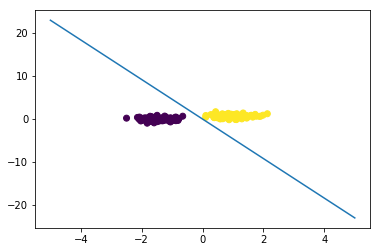

In [106]:
X, T = gen_binary(100, False)
W = run_delta(X,T,5)
plot_decision_boundary(X,W,T)

# Main

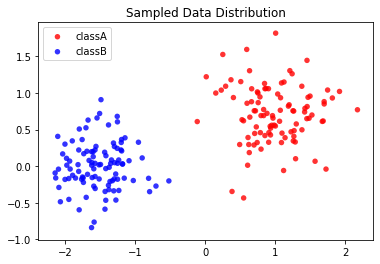

In [27]:
data = gen_binary()